In [1]:
import pandas as pd
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_f1478bb770824487821e5a31f3bb594c.csv"
df=pd.read_csv(url)
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [2]:
df=df.drop(["No","year","station"],axis=1)
df.head()

,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7
1,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9
2,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3
3,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9
4,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2


In [3]:
df.shape

(35064, 15)

In [4]:
df.isna().any()

month    False
day      False
hour     False
PM2.5     True
PM10      True
SO2       True
NO2       True
CO        True
O3        True
TEMP      True
PRES      True
DEWP      True
RAIN      True
wd        True
WSPM      True
dtype: bool

In [5]:
rows=df[df[["PM2.5"]].isnull().any(axis=1)]
rows

,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
1258,4,22,10,NaN,175.0,49.0,68.0,1100.0,33.0,14.1,1011.2,5.4,0.0,S,3.5
1259,4,22,11,NaN,205.0,51.0,70.0,1200.0,50.0,14.5,1011.0,6.1,0.0,SSW,3.1
1260,4,22,12,NaN,196.0,57.0,62.0,1300.0,55.0,14.3,1010.9,6.1,0.0,SSW,3.1
1331,4,25,11,NaN,73.0,3.0,23.0,400.0,90.0,20.0,1009.7,-8.4,0.0,NNW,5.2
1620,5,7,12,NaN,NaN,46.0,109.0,2200.0,25.0,28.8,1011.3,11.4,0.0,WSW,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35026,2,27,10,NaN,NaN,NaN,NaN,NaN,NaN,6.8,1019.3,-5.2,0.0,E,1.9
35029,2,27,13,NaN,6.0,40.0,93.0,200.0,32.0,14.0,1015.8,-5.2,0.0,SSE,1.8
35042,2,28,2,NaN,NaN,NaN,NaN,NaN,NaN,8.6,1016.0,-10.9,0.0,NNE,0.9
35054,2,28,14,NaN,6.0,2.0,10.0,200.0,94.0,14.6,1013.3,-15.6,0.0,N,3.6


In [6]:
df25=df.drop(rows.index)
df25.shape

(34436, 15)

In [7]:
df25.isna().any()

month    False
day      False
hour     False
PM2.5    False
PM10      True
SO2       True
NO2       True
CO        True
O3        True
TEMP      True
PRES      True
DEWP      True
RAIN      True
wd        True
WSPM      True
dtype: bool

In [8]:
df25.dtypes

month      int64
day        int64
hour       int64
PM2.5    float64
PM10     float64
SO2      float64
NO2      float64
CO       float64
O3       float64
TEMP     float64
PRES     float64
DEWP     float64
RAIN     float64
wd        object
WSPM     float64
dtype: object

In [9]:
wd=df25[["wd"]]
wd.mode()

,wd
0,ENE


In [10]:
wd=wd.fillna("ENE")
wd.isna().any()

wd    False
dtype: bool

In [11]:
df25_sub=df25.drop(["wd"],axis=1)
df25_sub=df25_sub.fillna(df25_sub.median())
df25_sub.isna().any()

month    False
day      False
hour     False
PM2.5    False
PM10     False
SO2      False
NO2      False
CO       False
O3       False
TEMP     False
PRES     False
DEWP     False
RAIN     False
WSPM     False
dtype: bool

In [12]:
from sklearn.preprocessing import LabelEncoder
wd=wd.apply(LabelEncoder().fit_transform)
wd.head()

,wd
0,6
1,7
2,6
3,3
4,6


In [13]:
df25=pd.concat([df25_sub,wd],axis=1)
df25.head()

,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
0,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,5.7,6
1,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,3.9,7
2,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,5.3,6
3,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,4.9,3
4,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,3.2,6


In [14]:
df25.isna().any()

month    False
day      False
hour     False
PM2.5    False
PM10     False
SO2      False
NO2      False
CO       False
O3       False
TEMP     False
PRES     False
DEWP     False
RAIN     False
WSPM     False
wd       False
dtype: bool

In [16]:
import numpy as np
np.unique(df25["month"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [17]:
df1=df25[df25["month"]==1]
df2=df25[df25["month"]==2]
df3=df25[df25["month"]==3]
df4=df25[df25["month"]==4]
df5=df25[df25["month"]==5]
df6=df25[df25["month"]==6]
df7=df25[df25["month"]==7]
df8=df25[df25["month"]==8]
df9=df25[df25["month"]==9]
df10=df25[df25["month"]==10]
df11=df25[df25["month"]==11]
df12=df25[df25["month"]==12]

In [18]:
X1=df1.drop(["PM2.5","PM10"],axis=1)
X1.head()

,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
7344,1,1,0,15.0,73.0,900.0,44.0,-0.4,1009.1,-14.4,0.0,1.2,13
7345,1,1,1,39.0,84.0,1500.0,4.0,-1.1,1008.8,-13.0,0.0,1.2,14
7346,1,1,2,39.0,85.0,1700.0,4.0,-1.4,1008.8,-13.0,0.0,0.7,11
7347,1,1,3,63.0,83.0,1700.0,5.0,-2.4,1008.2,-12.5,0.0,0.6,9
7348,1,1,4,55.0,83.0,2100.0,3.0,-2.5,1008.0,-12.6,0.0,0.4,6


In [19]:
X1.shape

(2954, 13)

In [20]:
y1=df1[["PM2.5"]]
y1.head()

,PM2.5
7344,31.0
7345,58.0
7346,68.0
7347,83.0
7348,75.0


In [21]:
from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler()
X1=pd.DataFrame(scaler1.fit_transform(X1),columns=X1.columns)
X1.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
0,0.0,-1.674908,-1.656847,-0.638402,0.136690,-0.572416,0.695165,0.307589,-2.357427,0.022373,-0.046046,-0.560354,1.666042
1,0.0,-1.674908,-1.512617,0.066067,0.419616,-0.230471,-1.023685,0.145195,-2.404767,0.228952,-0.046046,-0.560354,1.895857
2,0.0,-1.674908,-1.368386,0.066067,0.445336,-0.116490,-1.023685,0.075598,-2.404767,0.228952,-0.046046,-0.951508,1.206412
3,0.0,-1.674908,-1.224155,0.770535,0.393895,-0.116490,-0.980713,-0.156392,-2.499447,0.302731,-0.046046,-1.029739,0.746782
4,0.0,-1.674908,-1.079924,0.535712,0.393895,0.111474,-1.066656,-0.179591,-2.531006,0.287975,-0.046046,-1.186201,0.057337


In [22]:
scaler_y1=StandardScaler()
y1=pd.DataFrame(scaler_y1.fit_transform(y1),columns=y1.columns)
y1.head()

,PM2.5
0,-0.638742
1,-0.395281
2,-0.305110
3,-0.169854
4,-0.241990


In [101]:
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=mutual_info_regression, k="all")
fit = test.fit(X1, np.asarray(y1).reshape(y1.shape[0],))
features = fit.transform(X1)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
5,1.036288
4,0.774710
3,0.651047
9,0.460609
6,0.399789
1,0.263114
12,0.251348
11,0.204296
8,0.201854
7,0.099467


In [102]:
from sklearn.feature_selection import f_regression

# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=f_regression, k="all")
fit = test.fit(X1, np.asarray(y1).reshape(y1.shape[0],))
features = fit.transform(X1)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


,scores
5,7696.401252
4,4807.893007
9,1760.734242
3,1292.009836
6,1100.052882
11,589.919476
8,434.788615
12,131.414998
1,124.433388
2,0.739032


In [23]:
X1=X1.drop(["month"],axis=1)
X1.shape

(2954, 12)

In [24]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
print(X1_train.shape)
print(X1_test.shape)

(2363, 12)
(591, 12)


In [25]:
from sklearn.ensemble import GradientBoostingRegressor
gradient1=GradientBoostingRegressor(n_estimators=15000,min_samples_split=3,min_samples_leaf=3,max_features="sqrt",max_depth=24,loss="ls",learning_rate=0.01,criterion="mse",subsample=0.95,validation_fraction=0.2,random_state=0).fit(X1_train,y1_train)
gradient1

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=24,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=3, min_samples_split=3,
             min_weight_fraction_leaf=0.0, n_estimators=15000,
             n_iter_no_change=None, presort='auto', random_state=0,
             subsample=0.95, tol=0.0001, validation_fraction=0.2,
             verbose=0, warm_start=False)

In [26]:
from sklearn.metrics import r2_score
y0_pred=gradient1.predict(X1_train)
print("R-squared for train data is: ",r2_score(y1_train,y0_pred))
y1_pred=gradient1.predict(X1_test)
print("R-squared for test data is: ", r2_score(y1_test,y1_pred))

R-squared for train data is:  0.9999999029131411
R-squared for test data is:  0.9560878138865554


In [27]:
y1_train=scaler_y1.inverse_transform(y1_train)
y1_train=y1_train.reshape(y1_train.shape[0],)

In [28]:
y0_pred=scaler_y1.inverse_transform(y0_pred)

In [29]:
y1_test=scaler_y1.inverse_transform(y1_test)
y1_test=y1_test.reshape(y1_test.shape[0],)

In [30]:
y1_pred=scaler_y1.inverse_transform(y1_pred)
y1_pred=y1_pred.reshape(y1_pred.shape[0],)

In [31]:
from sklearn.metrics import mean_squared_error as mse
print("RMSE on train data: ",np.sqrt(mse(y1_train,y0_pred)))
print("RMSE on test data: ",np.sqrt(mse(y1_test,y1_pred)))

RMSE on train data:  0.0345424824261546
RMSE on test data:  23.272959553293802


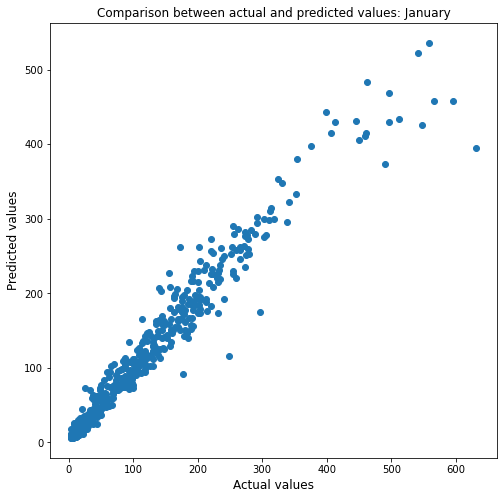

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(y1_test,y1_pred)
plt.title("Comparison between actual and predicted values: January",fontsize=12)
plt.xlabel("Actual values",fontsize=12)
plt.ylabel("Predicted values",fontsize=12)
plt.show()

In [77]:
X2=df2.drop(["PM2.5","PM10"],axis=1)
X2.head()

,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
8088,2,1,0,60.0,53.0,2100.0,3.0,1.6,1014.5,-1.0,0.0,0.9,11
8089,2,1,1,49.0,50.0,1900.0,4.0,1.8,1014.7,-1.6,0.0,0.9,4
8090,2,1,2,77.0,59.0,1600.0,4.0,1.8,1014.2,-3.5,0.0,0.9,4
8091,2,1,3,80.0,60.0,1600.0,3.0,1.8,1013.6,-3.9,0.0,1.1,1
8092,2,1,4,86.0,64.0,1600.0,3.0,1.7,1013.3,-4.4,0.0,1.7,5


In [78]:
y2=df2[["PM2.5"]]
y2.head()

,PM2.5
8088,162.0
8089,161.0
8090,158.0
8091,150.0
8092,157.0


In [79]:
from sklearn.preprocessing import StandardScaler
scaler2=StandardScaler()
X2=pd.DataFrame(scaler2.fit_transform(X2),columns=X2.columns)
X2.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
0,0.0,-1.659292,-1.659798,0.775251,-0.025392,0.518745,-1.355756,0.095143,-1.180478,1.787627,-0.116681,-0.827397,1.095198
1,0.0,-1.659292,-1.515665,0.463830,-0.108387,0.369613,-1.319830,0.140635,-1.149708,1.699259,-0.116681,-0.827397,-0.470257
2,0.0,-1.659292,-1.371532,1.256539,0.140597,0.145915,-1.319830,0.140635,-1.226633,1.419426,-0.116681,-0.827397,-0.470257
3,0.0,-1.659292,-1.227400,1.341472,0.168261,0.145915,-1.355756,0.140635,-1.318943,1.360514,-0.116681,-0.690026,-1.141167
4,0.0,-1.659292,-1.083267,1.511338,0.278921,0.145915,-1.355756,0.117889,-1.365097,1.286874,-0.116681,-0.277912,-0.246621


In [80]:
X2.shape

(2666, 13)

In [81]:
scaler_y2=StandardScaler()
y2=pd.DataFrame(scaler_y2.fit_transform(y2),columns=y2.columns)
y2.head()

,PM2.5
0,0.652521
1,0.643152
2,0.615045
3,0.540094
4,0.605677


In [134]:
test = SelectKBest(score_func=mutual_info_regression, k="all")
fit = test.fit(X2, np.asarray(y2).reshape(y2.shape[0],))
features = fit.transform(X2)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
5,0.921960
3,0.731665
4,0.611802
9,0.491017
1,0.406328
6,0.387968
12,0.283322
8,0.227264
11,0.221866
7,0.067673


In [135]:
test = SelectKBest(score_func=f_regression, k="all")
fit = test.fit(X2, np.asarray(y2).reshape(y2.shape[0],))
features = fit.transform(X2)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


,scores
5,5864.430264
3,4062.094240
4,4003.891913
9,1522.298375
6,1227.367962
11,547.090194
8,222.454891
12,54.437957
7,18.451571
1,8.880071


In [82]:
X2=X2.drop(["month"],axis=1)
X2.shape

(2666, 12)

In [83]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
print(X2_train.shape)
print(X2_test.shape)

(2132, 12)
(534, 12)


In [84]:
gradient2=GradientBoostingRegressor(n_estimators=15500,min_samples_split=4,min_samples_leaf=3,max_features="sqrt",max_depth=26,loss="ls",learning_rate=0.02,criterion="mse",subsample=0.95,validation_fraction=0.2,random_state=0).fit(X2_train,y2_train)
gradient2

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.02, loss='ls', max_depth=26,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=3, min_samples_split=4,
             min_weight_fraction_leaf=0.0, n_estimators=15500,
             n_iter_no_change=None, presort='auto', random_state=0,
             subsample=0.95, tol=0.0001, validation_fraction=0.2,
             verbose=0, warm_start=False)

In [85]:
y0_pred=gradient2.predict(X2_train)
print("R-squared for train data is: ",r2_score(y2_train,y0_pred))
y1_pred=gradient2.predict(X2_test)
print("R-squared for test data is: ", r2_score(y2_test,y1_pred))

R-squared for train data is:  0.9999999075354125
R-squared for test data is:  0.9379168520587837


In [86]:
y2_train=scaler_y2.inverse_transform(y2_train)
y2_train=y2_train.reshape(y2_train.shape[0],)

In [88]:
y0_pred=scaler_y2.inverse_transform(y0_pred)

In [89]:
y2_test=scaler_y2.inverse_transform(y2_test)
y2_test=y2_test.reshape(y2_test.shape[0],)

In [90]:
y1_pred=scaler_y2.inverse_transform(y1_pred)
y1_pred=y1_pred.reshape(y1_pred.shape[0],)

In [91]:
print("RMSE on train data: ",np.sqrt(mse(y2_train,y0_pred)))
print("RMSE on test data: ",np.sqrt(mse(y2_test,y1_pred)))

RMSE on train data:  0.03324099819883351
RMSE on test data:  23.82485400266247


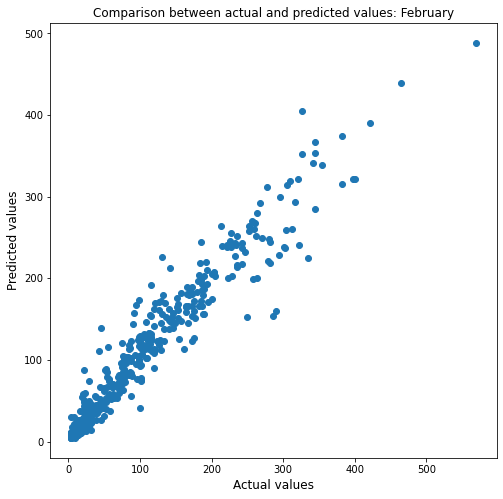

In [92]:
plt.figure(figsize=(8,8))
plt.scatter(y2_test,y1_pred)
plt.title("Comparison between actual and predicted values: February",fontsize=12)
plt.xlabel("Actual values",fontsize=12)
plt.ylabel("Predicted values",fontsize=12)
plt.show()

In [203]:
X3=df3.drop(["PM2.5","PM10"],axis=1)
X3.head()

,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
0,3,1,0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,5.7,6
1,3,1,1,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,3.9,7
2,3,1,2,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,5.3,6
3,3,1,3,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,4.9,3
4,3,1,4,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,3.2,6


In [204]:
y3=df3[["PM2.5"]]
y3.head()

,PM2.5
0,5.0
1,8.0
2,3.0
3,5.0
4,5.0


In [205]:
scaler3=StandardScaler()
X3=pd.DataFrame(scaler3.fit_transform(X3),columns=X3.columns)
X3.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
0,0.0,-1.67027,-1.651786,-0.931869,-1.390600,-1.047209,0.930924,-1.445098,1.195875,-1.609082,-0.070855,2.768319,-0.077501
1,0.0,-1.67027,-1.507662,-0.866626,-1.341856,-1.047209,0.903487,-1.477579,1.278823,-1.693413,-0.070855,1.396391,0.135899
2,0.0,-1.67027,-1.363538,-0.899247,-1.341856,-1.047209,0.876051,-1.558780,1.306473,-1.994597,-0.070855,2.463446,-0.077501
3,0.0,-1.67027,-1.219414,-0.899247,-1.341856,-1.047209,0.903487,-1.591260,1.430895,-2.103023,-0.070855,2.158573,-0.717700
4,0.0,-1.67027,-1.075290,-0.866626,-1.171250,-1.047209,0.711431,-1.672461,1.555317,-1.982549,-0.070855,0.862864,-0.077501


In [206]:
scaler_y3=StandardScaler()
y3=pd.DataFrame(scaler_y3.fit_transform(y3),columns=y3.columns)
y3.head()

,PM2.5
0,-1.040085
1,-1.006775
2,-1.062291
3,-1.040085
4,-1.040085


In [207]:
test = SelectKBest(score_func=mutual_info_regression, k="all")
fit = test.fit(X3, np.asarray(y3).reshape(y3.shape[0],))
features = fit.transform(X3)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
5,0.741279
3,0.597129
4,0.589280
9,0.496740
1,0.386359
8,0.260654
6,0.250381
12,0.167215
11,0.102157
7,0.070105


In [208]:
test = SelectKBest(score_func=f_regression, k="all")
fit = test.fit(X3, np.asarray(y3).reshape(y3.shape[0],))
features = fit.transform(X3)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


,scores
5,5092.712017
4,4411.954280
9,2358.041422
3,2166.310407
8,843.877289
11,483.684841
6,134.651472
12,88.230740
7,9.397226
2,1.471509


In [209]:
X3=X3.drop(["month"],axis=1)
X3.shape

(2938, 12)

In [237]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)
print(X3_train.shape)
print(X3_test.shape)

(2350, 12)
(588, 12)


In [238]:
from sklearn.ensemble import GradientBoostingRegressor
gradient3=GradientBoostingRegressor(n_estimators=15100,min_samples_split=3,min_samples_leaf=2,max_features="sqrt",max_depth=26,loss="ls",learning_rate=0.025,criterion="mse",subsample=0.95,validation_fraction=0.2,random_state=0).fit(X3_train,y3_train)
gradient3

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.025, loss='ls', max_depth=26,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=3,
             min_weight_fraction_leaf=0.0, n_estimators=15100,
             n_iter_no_change=None, presort='auto', random_state=0,
             subsample=0.95, tol=0.0001, validation_fraction=0.2,
             verbose=0, warm_start=False)

In [239]:
from sklearn.metrics import r2_score
y0_pred=gradient3.predict(X3_train)
print("R-squared for train data is: ",r2_score(y3_train,y0_pred))
y1_pred=gradient3.predict(X3_test)
print("R-squared for test data is: ", r2_score(y3_test,y1_pred))

R-squared for train data is:  0.9999999012329167
R-squared for test data is:  0.9363038945727002


In [240]:
y3_train=scaler_y3.inverse_transform(y3_train)
y3_train=y3_train.reshape(y3_train.shape[0],)

In [241]:
y0_pred=scaler_y3.inverse_transform(y0_pred)

In [242]:
y3_test=scaler_y3.inverse_transform(y3_test)
y3_test=y3_test.reshape(y3_test.shape[0],)

In [243]:
y1_pred=scaler_y3.inverse_transform(y1_pred)
y1_pred=y1_pred.reshape(y1_pred.shape[0],)

In [244]:
from sklearn.metrics import mean_squared_error as mse
print("RMSE on train data: ",np.sqrt(mse(y3_train,y0_pred)))
print("RMSE on test data: ",np.sqrt(mse(y3_test,y1_pred)))

RMSE on train data:  0.028052661146082163
RMSE on test data:  23.52028062029163


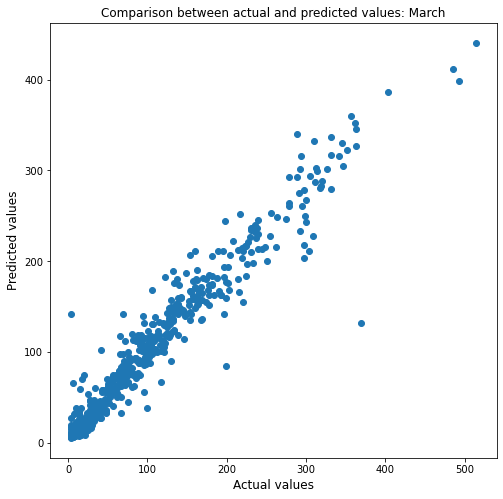

In [245]:
plt.figure(figsize=(8,8))
plt.scatter(y3_test,y1_pred)
plt.title("Comparison between actual and predicted values: March",fontsize=12)
plt.xlabel("Actual values",fontsize=12)
plt.ylabel("Predicted values",fontsize=12)
plt.show()

In [121]:
X4=df4.drop(["PM2.5","PM10"],axis=1)
X4.head()

,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
744,4,1,0,41.0,92.0,2100.0,2.0,7.1,1011.0,3.2,0.0,1.3,3
745,4,1,1,61.0,97.0,2500.0,2.0,6.7,1010.4,3.1,0.0,1.1,3
746,4,1,2,68.0,96.0,2399.0,2.0,6.8,1010.6,2.9,0.0,1.2,6
747,4,1,3,69.0,95.0,2799.0,2.0,7.1,1010.0,2.6,0.0,3.2,2
748,4,1,4,69.0,95.0,3399.0,2.0,5.7,1009.5,2.2,0.0,0.9,0


In [122]:
y4=df4[["PM2.5"]]
y4.head()

,PM2.5
744,229.0
745,236.0
746,239.0
747,210.0
748,210.0


In [123]:
scaler4=StandardScaler()
X4=pd.DataFrame(scaler4.fit_transform(X4),columns=X4.columns)
X4.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
0,0.0,-1.664126,-1.653735,1.470441,1.184443,2.069859,-1.388708,-1.433800,0.132097,0.403883,-0.08265,-0.700443,-0.931674
1,0.0,-1.664126,-1.509622,2.665087,1.343837,2.750001,-1.388708,-1.503253,0.033139,0.390656,-0.08265,-0.835325,-0.931674
2,0.0,-1.664126,-1.365509,3.083213,1.311958,2.578265,-1.388708,-1.485890,0.066125,0.364202,-0.08265,-0.767884,-0.284384
3,0.0,-1.664126,-1.221397,3.142946,1.280079,3.258407,-1.388708,-1.433800,-0.032834,0.324521,-0.08265,0.580939,-1.147438
4,0.0,-1.664126,-1.077284,3.142946,1.280079,4.278619,-1.388708,-1.676888,-0.115299,0.271613,-0.08265,-0.970207,-1.578965


In [124]:
scaler_y4=StandardScaler()
y4=pd.DataFrame(scaler_y4.fit_transform(y4),columns=y4.columns)
y4.head()

,PM2.5
0,2.794200
1,2.919545
2,2.973265
3,2.453978
4,2.453978


In [125]:
test = SelectKBest(score_func=mutual_info_regression, k="all")
fit = test.fit(X4, np.asarray(y4).reshape(y4.shape[0],))
features = fit.transform(X4)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
5,0.604765
9,0.471747
3,0.411516
4,0.344197
1,0.313099
6,0.192774
8,0.178620
12,0.127423
11,0.081297
7,0.028490


In [126]:
test = SelectKBest(score_func=f_regression, k="all")
fit = test.fit(X4, np.asarray(y4).reshape(y4.shape[0],))
features = fit.transform(X4)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


,scores
5,3387.591496
9,2049.744350
4,1358.460847
3,950.540892
8,175.305265
11,173.497857
7,54.890845
1,14.386175
6,10.651978
2,5.938744


In [127]:
X4=X4.drop(["month"],axis=1)
X4.shape

(2811, 12)

In [128]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)
print(X4_train.shape)
print(X4_test.shape)

(2248, 12)
(563, 12)


In [139]:
gradient4=GradientBoostingRegressor(n_estimators=15000,min_samples_split=3,min_samples_leaf=17,max_features="sqrt",max_depth=26,loss="ls",learning_rate=0.01,criterion="mse",subsample=0.95,validation_fraction=0.2,random_state=0).fit(X4_train,y4_train)
gradient4

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=26,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=17, min_samples_split=3,
             min_weight_fraction_leaf=0.0, n_estimators=15000,
             n_iter_no_change=None, presort='auto', random_state=0,
             subsample=0.95, tol=0.0001, validation_fraction=0.2,
             verbose=0, warm_start=False)

In [140]:
y0_pred=gradient4.predict(X4_train)
print("R-squared for train data is: ",r2_score(y4_train,y0_pred))
y1_pred=gradient4.predict(X4_test)
print("R-squared for test data is: ", r2_score(y4_test,y1_pred))

R-squared for train data is:  0.9999988176414173
R-squared for test data is:  0.8878949978096444


In [141]:
y4_train=scaler_y4.inverse_transform(y4_train)
y4_train=y4_train.reshape(y4_train.shape[0],)

In [142]:
y0_pred=scaler_y4.inverse_transform(y0_pred)

In [143]:
y4_test=scaler_y4.inverse_transform(y4_test)
y4_test=y4_test.reshape(y4_test.shape[0],)

In [144]:
y1_pred=scaler_y4.inverse_transform(y1_pred)
y1_pred=y1_pred.reshape(y1_pred.shape[0],)

In [145]:
print("RMSE on train data: ",np.sqrt(mse(y4_train,y0_pred)))
print("RMSE on test data: ",np.sqrt(mse(y4_test,y1_pred)))

RMSE on train data:  0.061383515666174
RMSE on test data:  17.864693533988024


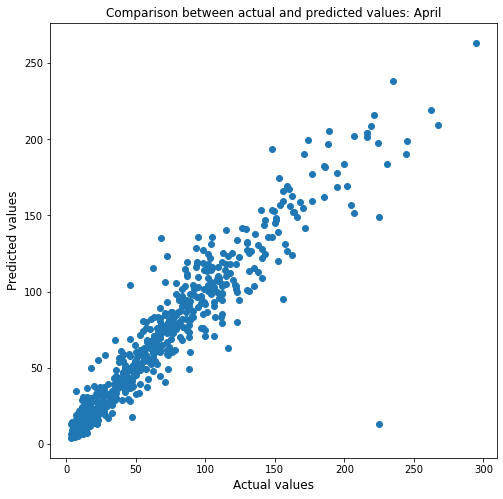

In [146]:
plt.figure(figsize=(8,8))
plt.scatter(y4_test,y1_pred)
plt.title("Comparison between actual and predicted values: April",fontsize=12)
plt.xlabel("Actual values",fontsize=12)
plt.ylabel("Predicted values",fontsize=12)
plt.show()

In [147]:
X5=df5.drop(["PM2.5","PM10"],axis=1)
X5.head()

,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
1464,5,1,0,9.0,37.0,500.0,79.0,13.3,1013.9,-1.1,0.0,2.0,0
1465,5,1,1,8.0,35.0,500.0,79.0,10.9,1014.3,0.0,0.0,0.0,0
1466,5,1,2,8.0,48.0,500.0,50.0,9.9,1014.4,1.8,0.0,0.7,5
1467,5,1,3,12.0,46.0,900.0,44.0,8.7,1014.1,1.4,0.0,0.0,5
1468,5,1,4,15.0,46.0,600.0,21.0,7.9,1014.1,1.5,0.0,0.0,3


In [148]:
y5=df5[["PM2.5"]]
y5.head()

,PM2.5
1464,29.0
1465,17.0
1466,20.0
1467,19.0
1468,24.0


In [149]:
from sklearn.preprocessing import StandardScaler
scaler5=StandardScaler()
X5=pd.DataFrame(scaler5.fit_transform(X5),columns=X5.columns)
X5.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
0,0.0,-1.681227,-1.660412,-0.403458,-0.456352,-0.583017,-0.213319,-1.500249,1.619040,-1.163842,-0.118198,-0.196154,-1.556905
1,0.0,-1.681227,-1.516158,-0.457722,-0.518861,-0.583017,-0.213319,-1.926093,1.685196,-1.002094,-0.118198,-1.574256,-1.556905
2,0.0,-1.681227,-1.371904,-0.457722,-0.112554,-0.583017,-0.645446,-2.103529,1.701734,-0.737414,-0.118198,-1.091920,-0.513182
3,0.0,-1.681227,-1.227649,-0.240667,-0.175063,0.040532,-0.734851,-2.316451,1.652118,-0.796232,-0.118198,-1.574256,-0.513182
4,0.0,-1.681227,-1.083395,-0.077875,-0.175063,-0.427129,-1.077572,-2.458399,1.652118,-0.781527,-0.118198,-1.574256,-0.930671


In [150]:
scaler_y5=StandardScaler()
y5=pd.DataFrame(scaler_y5.fit_transform(y5),columns=y5.columns)
y5.head()

,PM2.5
0,-0.676771
1,-0.909415
2,-0.851254
3,-0.870641
4,-0.773706


In [151]:
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression

test = SelectKBest(score_func=mutual_info_regression, k="all")
fit = test.fit(X5, np.asarray(y5).reshape(y5.shape[0],))
features = fit.transform(X5)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
5,0.515782
3,0.407282
9,0.361365
1,0.287324
4,0.186556
6,0.129850
8,0.107151
12,0.106105
7,0.054105
11,0.019829


In [152]:
test = SelectKBest(score_func=f_regression, k="all")
fit = test.fit(X5, np.asarray(y5).reshape(y5.shape[0],))
features = fit.transform(X5)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


,scores
5,1424.766769
9,1113.487273
3,1086.286010
4,513.991790
11,97.166337
7,33.649055
6,30.998546
12,28.446473
2,22.752466
8,1.093848


In [153]:
X5=X5.drop(["month"],axis=1)
X5.shape

(2910, 12)

In [154]:
from sklearn.model_selection import train_test_split
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)
print(X5_train.shape)
print(X5_test.shape)

(2328, 12)
(582, 12)


In [161]:
from sklearn.ensemble import GradientBoostingRegressor
gradient5=GradientBoostingRegressor(n_estimators=3000,min_samples_split=2,min_samples_leaf=2,max_features="log2",max_depth=26,loss="ls",learning_rate=0.01,criterion="mse",subsample=0.9,validation_fraction=0.2,random_state=0).fit(X5_train,y5_train)
gradient5

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=26,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             n_iter_no_change=None, presort='auto', random_state=0,
             subsample=0.9, tol=0.0001, validation_fraction=0.2, verbose=0,
             warm_start=False)

In [162]:
from sklearn.metrics import r2_score
y0_pred=gradient5.predict(X5_train)
print("R-squared for train data is: ",r2_score(y5_train,y0_pred))
y1_pred=gradient5.predict(X5_test)
print("R-squared for test data is: ", r2_score(y5_test,y1_pred))

R-squared for train data is:  0.9999998949518665
R-squared for test data is:  0.6767663734946436


In [163]:
y5_train=scaler_y5.inverse_transform(y5_train)
y5_train=y5_train.reshape(y5_train.shape[0],)

In [164]:
y0_pred=scaler_y5.inverse_transform(y0_pred)

In [165]:
y5_test=scaler_y5.inverse_transform(y5_test)
y5_test=y5_test.reshape(y5_test.shape[0],)

In [166]:
y1_pred=scaler_y5.inverse_transform(y1_pred)
y1_pred=y1_pred.reshape(y1_pred.shape[0],)

In [167]:
from sklearn.metrics import mean_squared_error as mse
print("RMSE on train data: ",np.sqrt(mse(y5_train,y0_pred)))
print("RMSE on test data: ",np.sqrt(mse(y5_test,y1_pred)))

RMSE on train data:  0.016019423131986305
RMSE on test data:  33.7610518855609


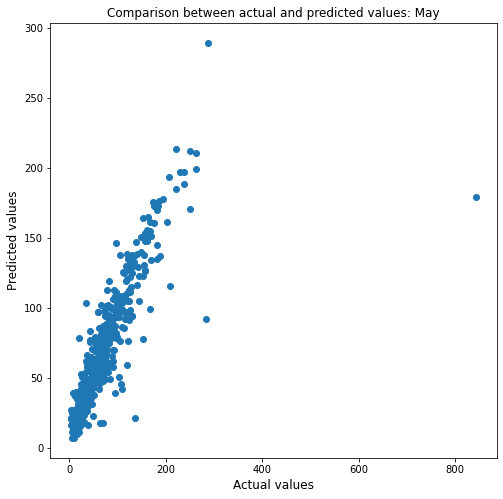

In [168]:
plt.figure(figsize=(8,8))
plt.scatter(y5_test,y1_pred)
plt.title("Comparison between actual and predicted values: May",fontsize=12)
plt.xlabel("Actual values",fontsize=12)
plt.ylabel("Predicted values",fontsize=12)
plt.show()


In [133]:
X6=df6.drop(["PM2.5","PM10"],axis=1)
X6.head()

,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
2208,6,1,0,23.0,47.0,900.0,89.0,21.6,999.7,16.1,0.0,0.7,1
2209,6,1,1,20.0,49.0,900.0,75.0,20.7,999.9,16.9,0.0,0.5,2
2210,6,1,2,15.0,67.0,1000.0,44.0,20.0,1000.0,17.2,0.0,0.9,0
2211,6,1,3,10.0,122.0,1200.0,2.0,20.2,1000.5,17.0,0.0,1.2,4
2212,6,1,4,8.0,125.0,1300.0,2.0,19.8,1001.6,16.6,0.0,1.1,4


In [134]:
y6=df6[["PM2.5"]]
y6.head()

,PM2.5
2208,108.0
2209,97.0
2210,114.0
2211,124.0
2212,120.0


In [135]:
from sklearn.preprocessing import StandardScaler
scaler6=StandardScaler()
X6=pd.DataFrame(scaler6.fit_transform(X6),columns=X6.columns)
X6.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
0,0.0,-1.669396,-1.657453,1.186352,0.029039,-0.223295,-0.127543,-0.692351,-0.365043,0.128367,-0.110852,-1.036661,-1.052821
1,0.0,-1.669396,-1.513285,0.916278,0.109092,-0.223295,-0.325635,-0.895478,-0.312945,0.317409,-0.110852,-1.240024,-0.842108
2,0.0,-1.669396,-1.369117,0.466155,0.829571,-0.116243,-0.764268,-1.053467,-0.286896,0.388300,-0.110852,-0.833299,-1.263533
3,0.0,-1.669396,-1.224948,0.016032,3.031036,0.097862,-1.358543,-1.008327,-0.156651,0.341039,-0.110852,-0.528256,-0.420684
4,0.0,-1.669396,-1.080780,-0.164017,3.151116,0.204914,-1.358543,-1.098606,0.129888,0.246518,-0.110852,-0.629937,-0.420684


In [136]:
scaler_y6=StandardScaler()
y6=pd.DataFrame(scaler_y6.fit_transform(y6),columns=y6.columns)
y6.head()

,PM2.5
0,0.601151
1,0.414983
2,0.702697
3,0.871940
4,0.804243


In [137]:
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=mutual_info_regression, k="all")
fit = test.fit(X6, np.asarray(y6).reshape(y6.shape[0],))
features = fit.transform(X6)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
5,0.699441
9,0.379535
3,0.271219
1,0.268892
4,0.142177
6,0.104457
8,0.099134
7,0.097468
12,0.071259
11,0.044909


In [138]:
X6=X6.drop(["month"],axis=1)
X6.shape

(2843, 12)

In [139]:
from sklearn.model_selection import train_test_split
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.2, random_state=42)
print(X6_train.shape)
print(X6_test.shape)

(2274, 12)
(569, 12)


In [176]:
gradient6=GradientBoostingRegressor(n_estimators=10000,min_samples_split=4,min_samples_leaf=2,max_features="sqrt",max_depth=25,loss="ls",learning_rate=0.015,criterion="mse",subsample=0.85,validation_fraction=0.2,random_state=0).fit(X6_train,y6_train)
gradient6

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.015, loss='ls', max_depth=25,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=4,
             min_weight_fraction_leaf=0.0, n_estimators=10000,
             n_iter_no_change=None, presort='auto', random_state=0,
             subsample=0.85, tol=0.0001, validation_fraction=0.2,
             verbose=0, warm_start=False)

In [177]:
from sklearn.metrics import r2_score
y0_pred=gradient6.predict(X6_train)
print("R-squared for train data is: ",r2_score(y6_train,y0_pred))
y1_pred=gradient6.predict(X6_test)
print("R-squared for test data is: ", r2_score(y6_test,y1_pred))

R-squared for train data is:  0.9999999082832384
R-squared for test data is:  0.8911753974601184


In [178]:
y6_train=scaler_y6.inverse_transform(y6_train)
y6_train=y6_train.reshape(y6_train.shape[0],)

In [179]:
y0_pred=scaler_y6.inverse_transform(y0_pred)

In [180]:
y6_test=scaler_y6.inverse_transform(y6_test)
y6_test=y6_test.reshape(y6_test.shape[0],)

In [181]:
y1_pred=scaler_y6.inverse_transform(y1_pred)
y1_pred=y1_pred.reshape(y1_pred.shape[0],)

In [182]:
print("RMSE on train data: ",np.sqrt(mse(y6_train,y0_pred)))
print("RMSE on test data: ",np.sqrt(mse(y6_test,y1_pred)))

RMSE on train data:  0.018093471294428082
RMSE on test data:  18.51694786566181


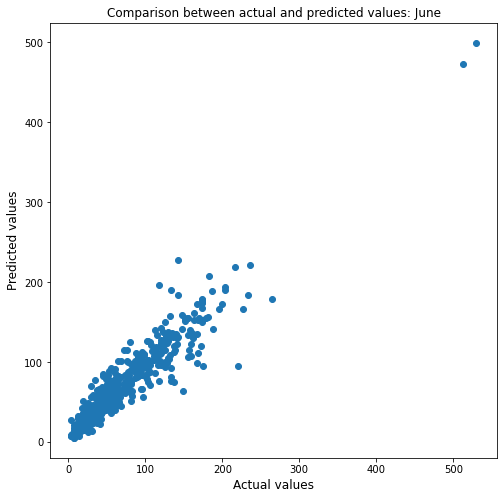

In [183]:
plt.figure(figsize=(8,8))
plt.scatter(y6_test,y1_pred)
plt.title("Comparison between actual and predicted values: June",fontsize=12)
plt.xlabel("Actual values",fontsize=12)
plt.ylabel("Predicted values",fontsize=12)
plt.show()

In [18]:
X7=df7.drop(["PM2.5","PM10"],axis=1)
X7.head()

,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
2928,7,1,0,12.0,45.0,1100.0,88.0,24.9,997.6,23.5,0.0,0.5,1
2929,7,1,1,9.0,50.0,1100.0,72.0,24.4,996.5,23.5,0.0,0.1,3
2930,7,1,2,10.0,49.0,1000.0,67.0,24.3,996.3,23.4,0.0,0.7,4
2931,7,1,3,11.0,49.0,1100.0,52.0,24.2,996.3,23.2,0.0,1.4,1
2932,7,1,4,11.0,58.0,1200.0,26.0,23.9,996.7,23.2,0.0,0.8,1


In [19]:
y7=df7[["PM2.5"]]
y7.head()

,PM2.5
2928,147.0
2929,172.0
2930,151.0
2931,160.0
2932,164.0


In [20]:
from sklearn.preprocessing import StandardScaler
scaler7=StandardScaler()
X7=pd.DataFrame(scaler7.fit_transform(X7),columns=X7.columns)
X7.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
0,0.0,-1.687279,-1.656412,0.707430,0.156318,0.160014,-0.152834,-0.657479,-0.610845,1.031306,-0.148455,-1.286440,-1.106634
1,0.0,-1.687279,-1.512122,0.307258,0.379717,0.160014,-0.374152,-0.787256,-0.904608,1.031306,-0.148455,-1.735287,-0.682035
2,0.0,-1.687279,-1.367832,0.440649,0.335037,-0.034118,-0.443314,-0.813211,-0.958019,1.003550,-0.148455,-1.062017,-0.469735
3,0.0,-1.687279,-1.223541,0.574039,0.335037,0.160014,-0.650800,-0.839167,-0.958019,0.948038,-0.148455,-0.276534,-1.106634
4,0.0,-1.687279,-1.079251,0.574039,0.737155,0.354145,-1.010442,-0.917033,-0.851196,0.948038,-0.148455,-0.949805,-1.106634


In [21]:
scaler_y7=StandardScaler()
y7=pd.DataFrame(scaler_y7.fit_transform(y7),columns=y7.columns)
y7.head()

,PM2.5
0,1.478077
1,1.966940
2,1.556295
3,1.732286
4,1.810504


In [22]:
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression

test = SelectKBest(score_func=mutual_info_regression, k="all")
fit = test.fit(X7, np.asarray(y7).reshape(y7.shape[0],))
features = fit.transform(X7)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
5,0.518819
9,0.294981
1,0.287745
8,0.104233
3,0.096954
7,0.096105
12,0.092057
4,0.072000
6,0.047085
11,0.018857


In [23]:
test = SelectKBest(score_func=f_regression, k="all")
fit = test.fit(X7, np.asarray(y7).reshape(y7.shape[0],))
features = fit.transform(X7)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


,scores
5,2371.782575
9,1173.221631
3,294.421323
8,59.235693
4,38.309999
6,32.952843
11,15.895746
10,11.216925
1,7.735580
7,3.230845


In [24]:
X7=X7.drop(["month"],axis=1)
X7.shape

(2935, 12)

In [26]:
from sklearn.model_selection import train_test_split
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.2, random_state=42)
print(X7_train.shape)
print(X7_test.shape)

(2348, 12)
(587, 12)


In [45]:
from sklearn.ensemble import GradientBoostingRegressor
gradient7=GradientBoostingRegressor(n_estimators=15000,min_samples_split=3,min_samples_leaf=8,max_features="sqrt",max_depth=26,loss="ls",learning_rate=0.01,criterion="mse",subsample=0.95,validation_fraction=0.2,random_state=0).fit(X7_train,y7_train)
gradient7

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=26,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=8, min_samples_split=3,
             min_weight_fraction_leaf=0.0, n_estimators=15000,
             n_iter_no_change=None, presort='auto', random_state=0,
             subsample=0.95, tol=0.0001, validation_fraction=0.2,
             verbose=0, warm_start=False)

In [46]:
from sklearn.metrics import r2_score
y0_pred=gradient7.predict(X7_train)
print("R-squared for train data is: ",r2_score(y7_train,y0_pred))
y1_pred=gradient7.predict(X7_test)
print("R-squared for test data is: ", r2_score(y7_test,y1_pred))

R-squared for train data is:  0.9999999031576824
R-squared for test data is:  0.9051345765521035


In [47]:
y7_train=scaler_y7.inverse_transform(y7_train)
y7_train=y7_train.reshape(y7_train.shape[0],)

In [48]:
y0_pred=scaler_y7.inverse_transform(y0_pred)

In [49]:
y7_test=scaler_y7.inverse_transform(y7_test)
y7_test=y7_test.reshape(y7_test.shape[0],)

In [50]:
y1_pred=scaler_y7.inverse_transform(y1_pred)
y1_pred=y1_pred.reshape(y1_pred.shape[0],)

In [52]:
from sklearn.metrics import mean_squared_error as mse
print("RMSE on train data: ",np.sqrt(mse(y7_train,y0_pred)))
print("RMSE on test data: ",np.sqrt(mse(y7_test,y1_pred)))

RMSE on train data:  0.01590650815795193
RMSE on test data:  15.774878368122499


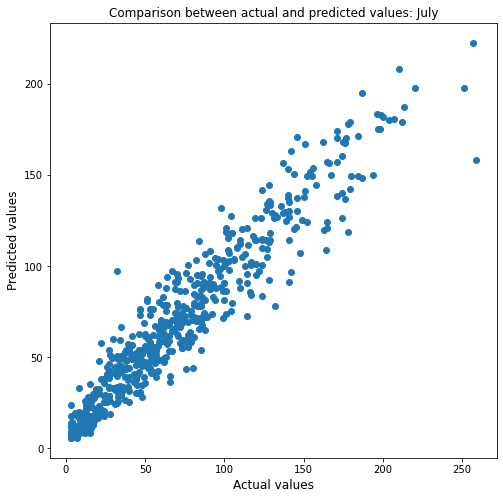

In [53]:
plt.figure(figsize=(8,8))
plt.scatter(y7_test,y1_pred)
plt.title("Comparison between actual and predicted values: July",fontsize=12)
plt.xlabel("Actual values",fontsize=12)
plt.ylabel("Predicted values",fontsize=12)
plt.show()

In [54]:
X8=df8.drop(["PM2.5","PM10"],axis=1)
X8.head()

,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
3672,8,1,0,3.0,20.0,800.0,85.0,22.0,997.5,21.3,0.0,1.5,3
3673,8,1,1,3.0,17.0,800.0,88.0,21.6,997.3,21.3,0.0,2.1,0
3674,8,1,2,3.0,16.0,700.0,85.0,21.4,997.4,21.1,0.0,1.1,9
3675,8,1,3,3.0,15.0,700.0,78.0,21.1,997.5,20.9,0.0,0.9,13
3676,8,1,4,3.0,15.0,700.0,62.0,20.9,997.8,20.7,0.0,0.5,13


In [55]:
y8=df8[["PM2.5"]]
y8.head()

,PM2.5
3672,37.0
3673,24.0
3674,29.0
3675,37.0
3676,37.0


In [56]:
scaler8=StandardScaler()
X8=pd.DataFrame(scaler8.fit_transform(X8),columns=X8.columns)
X8.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
0,0.0,-1.676635,-1.660983,-0.421311,-0.892280,-0.290294,-0.100081,-1.228829,-1.351978,0.520390,-0.095449,-0.091299,-0.670610
1,0.0,-1.676635,-1.516617,-0.421311,-1.008141,-0.290294,-0.056698,-1.328836,-1.401316,0.520390,-0.095449,0.607651,-1.299958
2,0.0,-1.676635,-1.372252,-0.421311,-1.046762,-0.504652,-0.100081,-1.378840,-1.376647,0.476752,-0.095449,-0.557265,0.588085
3,0.0,-1.676635,-1.227886,-0.421311,-1.085383,-0.504652,-0.201307,-1.453846,-1.351978,0.433115,-0.095449,-0.790248,1.427215
4,0.0,-1.676635,-1.083521,-0.421311,-1.085383,-0.504652,-0.432682,-1.503850,-1.277971,0.389477,-0.095449,-1.256215,1.427215


In [57]:
scaler_y8=StandardScaler()
y8=pd.DataFrame(scaler_y8.fit_transform(y8),columns=y8.columns)
y8.head()

,PM2.5
0,-0.418461
1,-0.720793
2,-0.604511
3,-0.418461
4,-0.418461


In [58]:
test = SelectKBest(score_func=mutual_info_regression, k="all")
fit = test.fit(X8, np.asarray(y8).reshape(y8.shape[0],))
features = fit.transform(X8)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
5,0.742027
9,0.424306
1,0.226559
3,0.175473
8,0.152527
4,0.106011
6,0.092305
12,0.072260
7,0.041694
11,0.018178


In [59]:
test = SelectKBest(score_func=f_regression, k="all")
fit = test.fit(X8, np.asarray(y8).reshape(y8.shape[0],))
features = fit.transform(X8)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


,scores
5,3698.391695
9,2127.330654
3,311.428381
4,307.527691
1,177.946084
8,111.556457
7,54.938761
11,51.398804
6,9.935516
2,3.418632


In [60]:
X8=X8.drop(["month"],axis=1)
X8.shape

(2964, 12)

In [61]:
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=0.2, random_state=42)
print(X8_train.shape)
print(X8_test.shape)

(2371, 12)
(593, 12)


In [86]:
gradient8=GradientBoostingRegressor(n_estimators=15000,min_samples_split=2,min_samples_leaf=18,max_features="sqrt",max_depth=25,loss="ls",learning_rate=0.02,criterion="mse",subsample=0.95,validation_fraction=0.2,random_state=0).fit(X8_train,y8_train)
gradient8

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.02, loss='ls', max_depth=25,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=18, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=15000,
             n_iter_no_change=None, presort='auto', random_state=0,
             subsample=0.95, tol=0.0001, validation_fraction=0.2,
             verbose=0, warm_start=False)

In [87]:
y0_pred=gradient8.predict(X8_train)
print("R-squared for train data is: ",r2_score(y8_train,y0_pred))
y1_pred=gradient8.predict(X8_test)
print("R-squared for test data is: ", r2_score(y8_test,y1_pred))

R-squared for train data is:  0.9999998991180955
R-squared for test data is:  0.8893876803061201


In [88]:
y8_train=scaler_y8.inverse_transform(y8_train)
y8_train=y8_train.reshape(y8_train.shape[0],)

In [89]:
y0_pred=scaler_y8.inverse_transform(y0_pred)

In [90]:
y8_test=scaler_y8.inverse_transform(y8_test)
y8_test=y8_test.reshape(y8_test.shape[0],)

In [91]:
y1_pred=scaler_y8.inverse_transform(y1_pred)
y1_pred=y1_pred.reshape(y1_pred.shape[0],)

In [92]:
print("RMSE on train data: ",np.sqrt(mse(y8_train,y0_pred)))
print("RMSE on test data: ",np.sqrt(mse(y8_test,y1_pred)))

RMSE on train data:  0.013585485870575544
RMSE on test data:  14.597260341847306


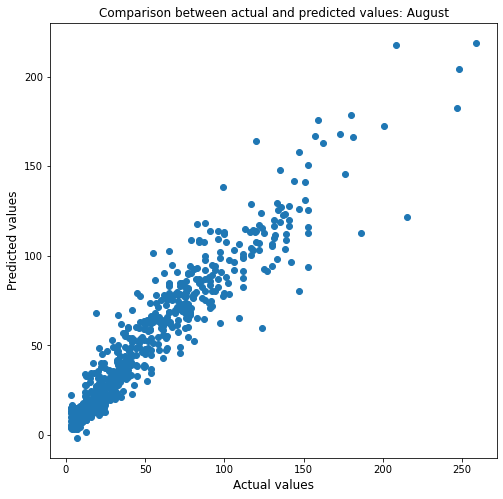

In [93]:
plt.figure(figsize=(8,8))
plt.scatter(y8_test,y1_pred)
plt.title("Comparison between actual and predicted values: August",fontsize=12)
plt.xlabel("Actual values",fontsize=12)
plt.ylabel("Predicted values",fontsize=12)
plt.show()

In [94]:
X9=df9.drop(["PM2.5","PM10"],axis=1)
X9.head()

,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
4416,9,1,0,7.0,95.0,900.0,10.0,20.0,1009.1,16.6,0.0,1.5,4
4417,9,1,1,11.0,58.0,1400.0,33.0,19.0,1009.2,16.2,0.0,1.2,5
4418,9,1,2,9.0,56.0,1500.0,24.0,18.5,1009.4,15.7,0.0,1.0,5
4419,9,1,3,7.0,64.0,1400.0,6.0,17.5,1009.2,14.9,0.0,0.6,1
4420,9,1,4,8.0,73.0,1300.0,1.0,16.2,1009.5,14.6,0.0,0.2,1


In [95]:
y9=df9[["PM2.5"]]
y9.head()

,PM2.5
4416,45.0
4417,71.0
4418,65.0
4419,51.0
4420,37.0


In [96]:
scaler9=StandardScaler()
X9=pd.DataFrame(scaler9.fit_transform(X9),columns=X9.columns)
X9.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
0,0.0,-1.673708,-1.655389,-0.142859,1.306465,-0.224621,-0.833148,-0.221095,-0.277567,0.547261,-0.108227,0.007282,-0.397629
1,0.0,-1.673708,-1.511525,0.261758,0.057302,0.567391,-0.415925,-0.450967,-0.257433,0.462706,-0.108227,-0.346413,-0.177736
2,0.0,-1.673708,-1.367661,0.059449,-0.010220,0.725793,-0.579186,-0.565904,-0.217164,0.357012,-0.108227,-0.582210,-0.177736
3,0.0,-1.673708,-1.223796,-0.142859,0.259869,0.567391,-0.905709,-0.795776,-0.257433,0.187902,-0.108227,-1.053804,-1.057309
4,0.0,-1.673708,-1.079932,-0.041705,0.563719,0.408988,-0.996410,-1.094611,-0.197029,0.124486,-0.108227,-1.525397,-1.057309


In [97]:
scaler_y9=StandardScaler()
y9=pd.DataFrame(scaler_y9.fit_transform(y9),columns=y9.columns)
y9.head()

,PM2.5
0,-0.362840
1,0.109536
2,0.000526
3,-0.253830
4,-0.508186


In [98]:
X9=X9.drop(["month"],axis=1)
X9.shape

(2801, 12)

In [99]:
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y9, test_size=0.2, random_state=42)
print(X9_train.shape)
print(X9_test.shape)

(2240, 12)
(561, 12)


In [112]:
gradient9=GradientBoostingRegressor(n_estimators=15000,min_samples_split=2,min_samples_leaf=20,max_features="sqrt",max_depth=26,loss="ls",learning_rate=0.02,criterion="mse",subsample=0.95,validation_fraction=0.2,random_state=0).fit(X9_train,y9_train)
gradient9

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.02, loss='ls', max_depth=26,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=20, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=15000,
             n_iter_no_change=None, presort='auto', random_state=0,
             subsample=0.95, tol=0.0001, validation_fraction=0.2,
             verbose=0, warm_start=False)

In [113]:
y0_pred=gradient9.predict(X9_train)
print("R-squared for train data is: ",r2_score(y9_train,y0_pred))
y1_pred=gradient9.predict(X9_test)
print("R-squared for test data is: ", r2_score(y9_test,y1_pred))

R-squared for train data is:  0.9999999057883484
R-squared for test data is:  0.9206962948755256


In [115]:
y9_train=scaler_y9.inverse_transform(y9_train)
y9_train=y9_train.reshape(y9_train.shape[0],)

In [116]:
y0_pred=scaler_y9.inverse_transform(y0_pred)

In [117]:
y9_test=scaler_y9.inverse_transform(y9_test)
y9_test=y9_test.reshape(y9_test.shape[0],)

In [118]:
y1_pred=scaler_y9.inverse_transform(y1_pred)
y1_pred=y1_pred.reshape(y1_pred.shape[0],)

In [119]:
print("RMSE on train data: ",np.sqrt(mse(y9_train,y0_pred)))
print("RMSE on test data: ",np.sqrt(mse(y9_test,y1_pred)))

RMSE on train data:  0.017159003237373505
RMSE on test data:  14.459599855840944


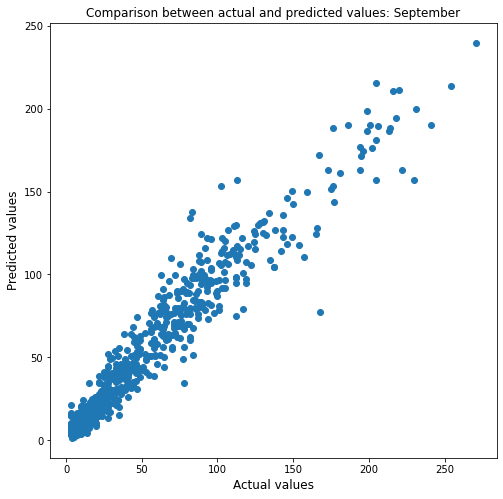

In [120]:
plt.figure(figsize=(8,8))
plt.scatter(y9_test,y1_pred)
plt.title("Comparison between actual and predicted values: September",fontsize=12)
plt.xlabel("Actual values",fontsize=12)
plt.ylabel("Predicted values",fontsize=12)
plt.show()

In [47]:
X10=df10.drop(["PM2.5","PM10"],axis=1)
X10.head()

,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
5136,10,1,0,16.0,117.0,2100.0,1.0,18.1,1012.8,17.3,0.0,0.8,4
5137,10,1,1,14.0,115.0,2600.0,1.0,18.0,1012.5,17.4,0.0,0.5,5
5138,10,1,2,13.0,105.0,2200.0,1.0,18.1,1012.0,17.3,0.0,0.7,0
5139,10,1,3,12.0,87.0,1800.0,1.0,18.1,1011.4,17.5,0.0,0.6,0
5140,10,1,4,12.0,77.0,1500.0,1.0,18.1,1011.5,17.3,0.0,0.6,6


In [48]:
y10=df10[["PM2.5"]]
y10.head()

,PM2.5
5136,192.0
5137,195.0
5138,193.0
5139,169.0
5140,128.0


In [49]:
scaler10=StandardScaler()
X10=pd.DataFrame(scaler10.fit_transform(X10),columns=X10.columns)
X10.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
0,0.0,-1.688527,-1.659803,0.365179,1.279484,1.014997,-0.766938,0.946963,-0.748158,1.632687,-0.111135,-0.607477,-0.421981
1,0.0,-1.688527,-1.515663,0.219368,1.228252,1.609364,-0.766938,0.926290,-0.803299,1.646960,-0.111135,-0.876658,-0.204549
2,0.0,-1.688527,-1.371524,0.146462,0.972089,1.133870,-0.766938,0.946963,-0.895199,1.632687,-0.111135,-0.697204,-1.291709
3,0.0,-1.688527,-1.227384,0.073556,0.510997,0.658376,-0.766938,0.946963,-1.005480,1.661234,-0.111135,-0.786931,-1.291709
4,0.0,-1.688527,-1.083244,0.073556,0.254834,0.301756,-0.766938,0.946963,-0.987100,1.632687,-0.111135,-0.786931,0.012883


In [50]:
scaler_y10=StandardScaler()
y10=pd.DataFrame(scaler_y10.fit_transform(y10),columns=y10.columns)
y10.head()

,PM2.5
0,0.938435
1,0.969405
2,0.948759
3,0.700999
4,0.277743


In [256]:
test = SelectKBest(score_func=mutual_info_regression, k="all")
fit = test.fit(X10, np.asarray(y10).reshape(y10.shape[0],))
features = fit.transform(X10)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
5,0.844083
4,0.491814
9,0.457090
1,0.320627
3,0.239906
8,0.232155
6,0.199836
11,0.142016
12,0.127583
7,0.061492


In [258]:
test = SelectKBest(score_func=f_regression, k="all")
fit = test.fit(X10, np.asarray(y10).reshape(y10.shape[0],))
features = fit.transform(X10)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


,scores
5,6510.194263
4,3178.113877
9,1625.996616
8,492.769271
11,416.518113
3,325.576967
12,176.237815
7,109.456324
1,26.340782
10,5.824774


In [51]:
X10=X10.drop(["month"],axis=1)
X10.shape

(2886, 12)

In [52]:
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10, test_size=0.2, random_state=42)
print(X10_train.shape)
print(X10_test.shape)

(2308, 12)
(578, 12)


In [53]:
gradient10=GradientBoostingRegressor(n_estimators=15100,min_samples_split=3,min_samples_leaf=3,max_features="sqrt",max_depth=24,loss="ls",learning_rate=0.025,criterion="mse",subsample=0.95,validation_fraction=0.2,random_state=0).fit(X10_train,y10_train)
gradient10

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.025, loss='ls', max_depth=24,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=3, min_samples_split=3,
             min_weight_fraction_leaf=0.0, n_estimators=15100,
             n_iter_no_change=None, presort='auto', random_state=0,
             subsample=0.95, tol=0.0001, validation_fraction=0.2,
             verbose=0, warm_start=False)

In [54]:
y0_pred=gradient10.predict(X10_train)
print("R-squared for train data is: ",r2_score(y10_train,y0_pred))
y1_pred=gradient10.predict(X10_test)
print("R-squared for test data is: ", r2_score(y10_test,y1_pred))

R-squared for train data is:  0.99999990295267
R-squared for test data is:  0.9472967053441801


In [55]:
y10_train=scaler_y10.inverse_transform(y10_train)
y10_train=y10_train.reshape(y10_train.shape[0],)

In [56]:
y0_pred=scaler_y10.inverse_transform(y0_pred)

In [57]:
y10_test=scaler_y10.inverse_transform(y10_test)
y10_test=y10_test.reshape(y10_test.shape[0],)

In [58]:
y1_pred=scaler_y10.inverse_transform(y1_pred)
y1_pred=y1_pred.reshape(y1_pred.shape[0],)

In [59]:
print("RMSE on train data: ",np.sqrt(mse(y10_train,y0_pred)))
print("RMSE on test data: ",np.sqrt(mse(y10_test,y1_pred)))

RMSE on train data:  0.030134496531352126
RMSE on test data:  22.350572413542743


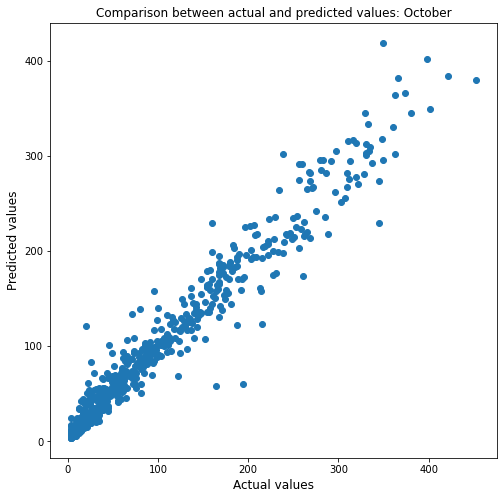

In [60]:
plt.figure(figsize=(8,8))
plt.scatter(y10_test,y1_pred)
plt.title("Comparison between actual and predicted values: October",fontsize=12)
plt.xlabel("Actual values",fontsize=12)
plt.ylabel("Predicted values",fontsize=12)
plt.show()

In [61]:
X11=df11.drop(["PM2.5","PM10"],axis=1)
X11.head()

,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
5880,11,1,0,7.0,134.0,2600.0,3.4272,4.7,1024.0,4.1,0.0,0.7,15
5881,11,1,1,9.0,152.0,3500.0,4.7124,4.6,1023.8,4.0,0.0,1.2,1
5882,11,1,2,10.0,160.0,4300.0,5.5692,4.3,1023.4,3.9,0.0,0.9,4
5883,11,1,3,10.0,153.0,3800.0,4.7124,4.2,1023.1,3.8,0.0,0.9,1
5884,11,1,4,11.0,160.0,3700.0,4.7124,4.3,1023.2,3.9,0.0,0.4,3


In [62]:
y11=df11[["PM2.5"]]
y11.head()

,PM2.5
5880,221.0
5881,246.0
5882,306.0
5883,300.0
5884,321.0


In [63]:
scaler11=StandardScaler()
X11=pd.DataFrame(scaler11.fit_transform(X11),columns=X11.columns)
X11.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
0,0.0,-1.663553,-1.656302,-0.582362,1.734865,0.593520,-0.738248,-0.025506,0.622506,1.199628,-0.158038,-0.737911,1.912102
1,0.0,-1.663553,-1.512142,-0.477875,2.214054,1.214779,-0.679516,-0.045151,0.588308,1.185874,-0.158038,-0.378615,-1.064278
2,0.0,-1.663553,-1.367982,-0.425632,2.427027,1.767009,-0.640361,-0.104085,0.519913,1.172119,-0.158038,-0.594192,-0.426483
3,0.0,-1.663553,-1.223822,-0.425632,2.240676,1.421865,-0.679516,-0.123730,0.468617,1.158364,-0.158038,-0.594192,-1.064278
4,0.0,-1.663553,-1.079662,-0.373389,2.427027,1.352836,-0.679516,-0.104085,0.485716,1.172119,-0.158038,-0.953488,-0.639081


In [64]:
scaler_y11=StandardScaler()
y11=pd.DataFrame(scaler_y11.fit_transform(y11),columns=y11.columns)
y11.head()

,PM2.5
0,1.120377
1,1.363505
2,1.947014
3,1.888663
4,2.092891


In [283]:
test = SelectKBest(score_func=mutual_info_regression, k="all")
fit = test.fit(X11, np.asarray(y11).reshape(y11.shape[0],))
features = fit.transform(X11)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
5,0.924225
4,0.714865
9,0.493809
3,0.361893
6,0.352108
1,0.305967
11,0.223909
8,0.207839
12,0.206432
7,0.160720


In [284]:
test = SelectKBest(score_func=f_regression, k="all")
fit = test.fit(X11, np.asarray(y11).reshape(y11.shape[0],))
features = fit.transform(X11)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


,scores
5,9243.286665
4,5678.547431
9,1116.100709
3,896.118045
6,843.239332
11,522.806004
8,388.995214
12,110.292930
7,21.949448
10,21.541344


In [65]:
X11=X11.drop(["month"],axis=1)
X11.shape

(2812, 12)

In [66]:
X11_train, X11_test, y11_train, y11_test = train_test_split(X11, y11, test_size=0.2, random_state=42)
print(X11_train.shape)
print(X11_test.shape)

(2249, 12)
(563, 12)


In [69]:
gradient11=GradientBoostingRegressor(n_estimators=15000,min_samples_split=3,min_samples_leaf=3,max_features="sqrt",max_depth=25,loss="ls",learning_rate=0.015,criterion="mse",subsample=0.95,validation_fraction=0.2,random_state=0).fit(X11_train,y11_train)
gradient11

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.015, loss='ls', max_depth=25,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=3, min_samples_split=3,
             min_weight_fraction_leaf=0.0, n_estimators=15000,
             n_iter_no_change=None, presort='auto', random_state=0,
             subsample=0.95, tol=0.0001, validation_fraction=0.2,
             verbose=0, warm_start=False)

In [70]:
y0_pred=gradient11.predict(X11_train)
print("R-squared for train data is: ",r2_score(y11_train,y0_pred))
y1_pred=gradient11.predict(X11_test)
print("R-squared for test data is: ", r2_score(y11_test,y1_pred))

R-squared for train data is:  0.9999999013312576
R-squared for test data is:  0.9677203758852717


In [71]:
y11_train=scaler_y11.inverse_transform(y11_train)
y11_train=y11_train.reshape(y11_train.shape[0],)

In [72]:
y0_pred=scaler_y11.inverse_transform(y0_pred)

In [73]:
y11_test=scaler_y11.inverse_transform(y11_test)
y11_test=y11_test.reshape(y11_test.shape[0],)

In [74]:
y1_pred=scaler_y11.inverse_transform(y1_pred)
y1_pred=y1_pred.reshape(y1_pred.shape[0],)

In [75]:
print("RMSE on train data: ",np.sqrt(mse(y11_train,y0_pred)))
print("RMSE on test data: ",np.sqrt(mse(y11_test,y1_pred)))

RMSE on train data:  0.032027684244471465
RMSE on test data:  19.082303522593257


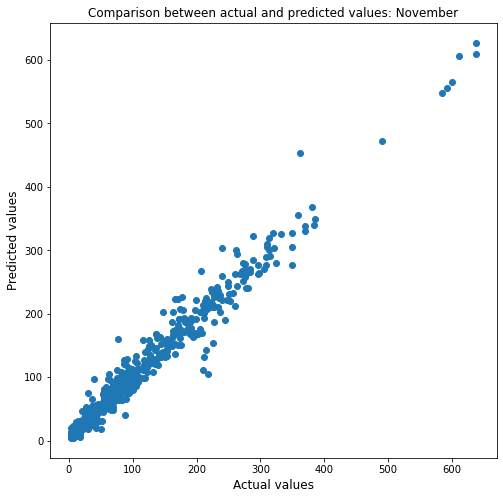

In [76]:
plt.figure(figsize=(8,8))
plt.scatter(y11_test,y1_pred)
plt.title("Comparison between actual and predicted values: November",fontsize=12)
plt.xlabel("Actual values",fontsize=12)
plt.ylabel("Predicted values",fontsize=12)
plt.show()

In [303]:
X12=df12.drop(["PM2.5","PM10"],axis=1)
X12.head()

,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
6600,12,1,0,26.0,59.3317,700.0,1.4994,-0.5,1021.7,-12.8,0.0,0.9,12
6601,12,1,1,30.0,59.1264,800.0,1.0000,-1.4,1021.6,-12.1,0.0,0.5,1
6602,12,1,2,26.0,60.1529,1100.0,2.0000,-2.3,1021.4,-11.8,0.0,0.4,6
6603,12,1,3,35.0,65.2854,1900.0,3.0000,-2.8,1021.0,-11.1,0.0,0.4,3
6604,12,1,4,30.0,61.7953,1500.0,2.0000,-2.5,1020.9,-11.0,0.0,0.8,1


In [304]:
y12=df12[["PM2.5"]]
y12.head()

,PM2.5
6600,21.0
6601,27.0
6602,27.0
6603,50.0
6604,44.0


In [305]:
scaler12=StandardScaler()
X12=pd.DataFrame(scaler12.fit_transform(X12),columns=X12.columns)
X12.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
0,0.0,-1.675809,-1.661020,-0.163959,-0.391651,-0.731447,-1.011653,-0.093278,-0.255227,-0.134627,-0.042218,-0.650089,1.411589
1,0.0,-1.675809,-1.516592,-0.023962,-0.396180,-0.684699,-1.036092,-0.324222,-0.273332,-0.024672,-0.042218,-0.905474,-1.007244
2,0.0,-1.675809,-1.372164,-0.163959,-0.373533,-0.544453,-0.987154,-0.555165,-0.309542,0.022452,-0.042218,-0.969321,0.092226
3,0.0,-1.675809,-1.227736,0.151035,-0.260295,-0.170465,-0.938216,-0.683467,-0.381962,0.132408,-0.042218,-0.969321,-0.567456
4,0.0,-1.675809,-1.083308,-0.023962,-0.337297,-0.357459,-0.987154,-0.606486,-0.400066,0.148116,-0.042218,-0.713935,-1.007244


In [306]:
scaler_y12=StandardScaler()
y12=pd.DataFrame(scaler_y12.fit_transform(y12),columns=y12.columns)
y12.head()

,PM2.5
0,-0.758909
1,-0.711886
2,-0.711886
3,-0.531631
4,-0.578654


In [307]:
test = SelectKBest(score_func=mutual_info_regression, k="all")
fit = test.fit(X12, np.asarray(y12).reshape(y12.shape[0],))
features = fit.transform(X12)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
5,1.040896
4,0.884988
9,0.550095
3,0.546259
6,0.521563
1,0.295537
11,0.261479
12,0.255760
8,0.191250
7,0.113019


In [308]:
test = SelectKBest(score_func=f_regression, k="all")
fit = test.fit(X12, np.asarray(y12).reshape(y12.shape[0],))
features = fit.transform(X12)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


,scores
5,10305.730757
4,7952.678816
9,3280.978621
6,1030.339327
3,763.121011
11,664.710930
12,208.541589
8,147.586384
7,55.653499
1,11.102192


In [309]:
X12=X12.drop(["month"],axis=1)
X12.shape

(2916, 12)

In [310]:
X12_train, X12_test, y12_train, y12_test = train_test_split(X12, y12, test_size=0.2, random_state=42)
print(X12_train.shape)
print(X12_test.shape)

(2332, 12)
(584, 12)


In [315]:
gradient12=GradientBoostingRegressor(n_estimators=15000,min_samples_split=3,min_samples_leaf=3,max_features="sqrt",max_depth=24,loss="ls",learning_rate=0.01,criterion="mse",subsample=0.95,validation_fraction=0.2,random_state=0).fit(X12_train,y12_train)
gradient12

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=24,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=3, min_samples_split=3,
             min_weight_fraction_leaf=0.0, n_estimators=15000,
             n_iter_no_change=None, presort='auto', random_state=0,
             subsample=0.95, tol=0.0001, validation_fraction=0.2,
             verbose=0, warm_start=False)

In [316]:
y0_pred=gradient12.predict(X12_train)
print("R-squared for train data is: ",r2_score(y12_train,y0_pred))
y1_pred=gradient12.predict(X12_test)
print("R-squared for test data is: ", r2_score(y12_test,y1_pred))

R-squared for train data is:  0.9999999039213664
R-squared for test data is:  0.966631529086136


In [317]:
y12_train=scaler_y12.inverse_transform(y12_train)
y12_train=y12_train.reshape(y12_train.shape[0],)

In [318]:
y0_pred=scaler_y12.inverse_transform(y0_pred)

In [319]:
y12_test=scaler_y12.inverse_transform(y12_test)
y12_test=y12_test.reshape(y12_test.shape[0],)

In [320]:
y1_pred=scaler_y12.inverse_transform(y1_pred)
y1_pred=y1_pred.reshape(y1_pred.shape[0],)

In [321]:
print("RMSE on train data: ",np.sqrt(mse(y12_train,y0_pred)))
print("RMSE on test data: ",np.sqrt(mse(y12_test,y1_pred)))

RMSE on train data:  0.03972326801616961
RMSE on test data:  22.878103169712677


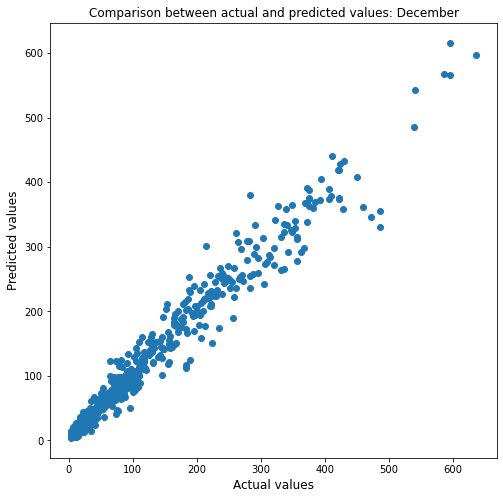

In [322]:
plt.figure(figsize=(8,8))
plt.scatter(y12_test,y1_pred)
plt.title("Comparison between actual and predicted values: December",fontsize=12)
plt.xlabel("Actual values",fontsize=12)
plt.ylabel("Predicted values",fontsize=12)
plt.show()

|Month|Train data RMSE|Test data RMSE|
|-----|--------------|---------------|
|January|0.035|23.67|
|February|0.033|23.82|
|March|0.028|23.520|
|April|0.061|17.865|
|May|0.016|33.761|
|June|0.018|18.517|
|July|0.016|15.775|
|August|0.0136|14.597|
|September|0.017|14.460|
|October|0.030|22.351|
|November|0.032|19.082|
|December|0.040|22.878|
|Average|0.028|20.858|